In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Dataset

In [38]:
# Load the dataset
df = pd.read_csv('train.csv')


In [39]:
# Display the first few rows of the dataset
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#  Data Exploration

In [40]:
# Explore the structure of the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
None


In [41]:
# Check for missing values
print(df.isnull().sum())



User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [42]:
# Summary statistics
print(df.describe())

            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5

# Data Cleaning

In [48]:
# Handle missing values (if any)
df.fillna(0, inplace=True)


In [49]:
# Check for missing values
print(df.isnull().sum())

User_ID                       0
Product_ID                    0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Gender_M                      0
City_Category_B               0
City_Category_C               0
dtype: int64


In [50]:
# Display the first few rows of the dataset
df.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,City_Category_B,City_Category_C
0,1000001,P00069042,0-17,10,2,0,3,0.0,0.0,8370,0,0,0
1,1000001,P00248942,0-17,10,2,0,1,6.0,14.0,15200,0,0,0
2,1000001,P00087842,0-17,10,2,0,12,0.0,0.0,1422,0,0,0
3,1000001,P00085442,0-17,10,2,0,12,14.0,0.0,1057,0,0,0
4,1000002,P00285442,55+,16,4+,0,8,0.0,0.0,7969,1,0,1


# Data Visualization

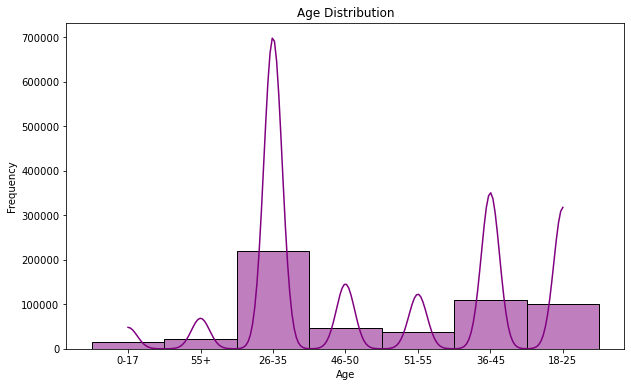

In [52]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

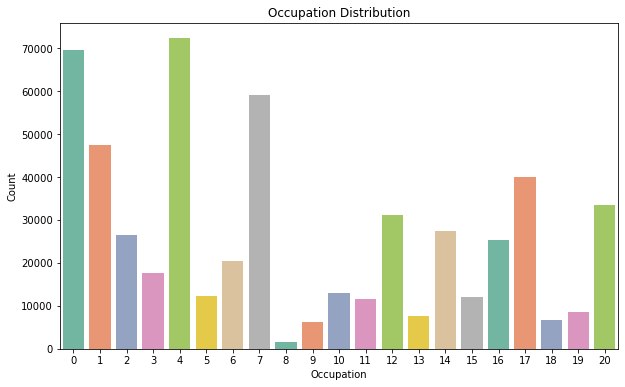

In [53]:
# Occupation Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Occupation', data=df, palette='Set2')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

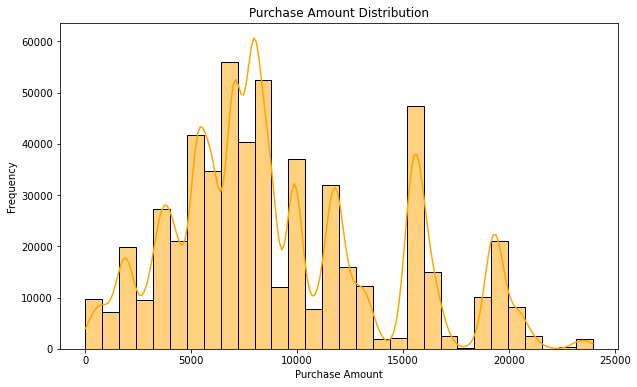

In [58]:
# Purchase Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], bins=30, kde=True, color='orange')
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

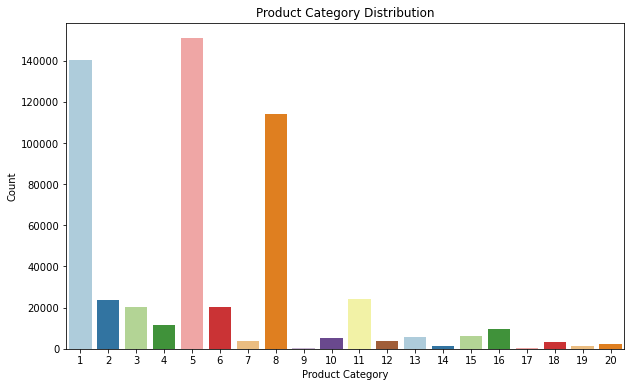

In [59]:
# Product Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_Category_1', data=df, palette='Paired')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

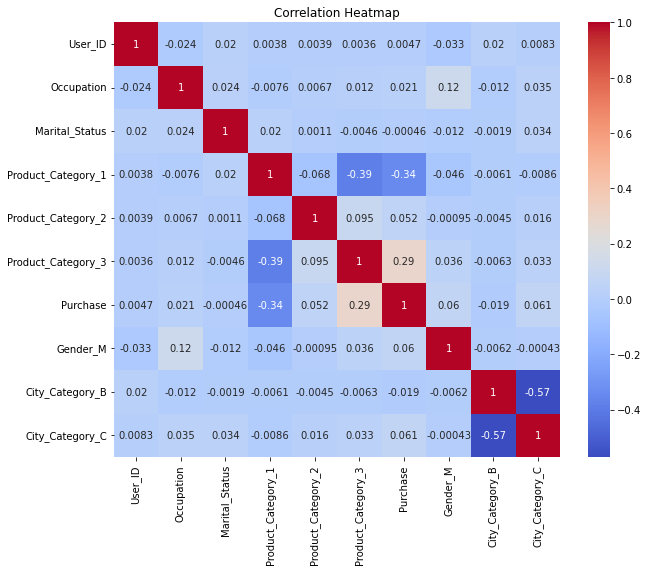

In [60]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Descriptive Analytics

In [61]:
# Summary Statistics
summary_stats = df.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
            User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase       Gender_M  \
count       550068.000000       550068.000000  550068.000000  550068.000000   
mean             6.735436            3.841941    9263.968713       0.753105   
std              6.215492            6.250712    5023.065394       0.431205 

In [62]:
# Total Purchase Amount
total_purchase_amount = df['Purchase'].sum()
print("\nTotal Purchase Amount:", total_purchase_amount)


Total Purchase Amount: 5095812742


In [63]:
# Most Common Products
most_common_products = df['Product_ID'].value_counts().head(5)
print("\nMost Common Products:")
print(most_common_products)


Most Common Products:
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
Name: Product_ID, dtype: int64


In [68]:
# Customer Demographics Summary
age_distribution = df['Age'].value_counts().sort_index()
occupation_distribution = df['Occupation'].value_counts().sort_index()

In [66]:
print("\nAge Distribution:")
print(age_distribution)


Age Distribution:
0-17      15102
18-25     99660
26-35    219587
36-45    110013
46-50     45701
51-55     38501
55+       21504
Name: Age, dtype: int64


In [67]:
print("\nOccupation Distribution:")
print(occupation_distribution)


Occupation Distribution:
0     69638
1     47426
2     26588
3     17650
4     72308
5     12177
6     20355
7     59133
8      1546
9      6291
10    12930
11    11586
12    31179
13     7728
14    27309
15    12165
16    25371
17    40043
18     6622
19     8461
20    33562
Name: Occupation, dtype: int64
